In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [2]:
with open('xoroshiro_results', 'r') as f:
    list_num = f. read().splitlines()
    
list_arr = np.asarray(list_num)
list_arr = list_arr.astype(np.float)

In [3]:
X = list_arr[:60000]
Y = list_arr[60000:120000]
Z = list_arr[120000:180000]
P = list_arr[180000:240000]
T = list_arr[240000:]

In [4]:
div = 2**64-1

In [5]:
for j in range(60000):
    P[j] = (P[j] / div)*10

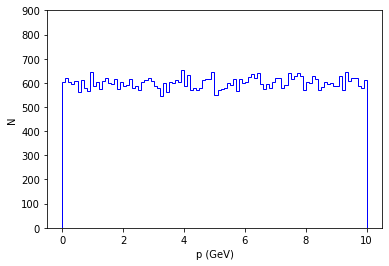

In [8]:
### plot momentum
plt.hist(P, bins = 100, color='blue', histtype='step')
plt.ylim(0,900)
plt.xlabel("p (GeV)")
plt.ylabel("N")
plt.show()

### plot space

from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, marker='o', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# PL and PT

In [10]:
for j in range(60000):
    T[j] = (T[j] / div)*2*mt.pi

In [11]:
PL = np.array([])
PT = np.array([])

In [12]:
for j in range(60000):
    pl = abs(P[j]*mt.cos(T[j]))
    pt = P[j]*mt.sqrt(1-mt.cos(T[j])**2)
    PL = np.append(PL, pl)
    PT = np.append(PT, pt)

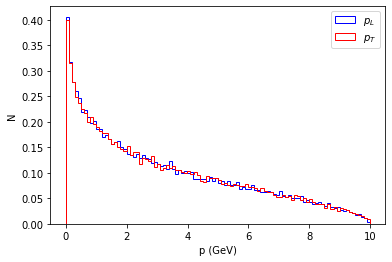

In [17]:
### plot momentum
plt.hist(PL, bins = 100, color='blue', density=True, histtype='step', label = '$p_L$')
plt.hist(PT, bins = 100, color='red', density=True, histtype='step', label = '$p_T$')
plt.legend()
plt.xlabel("p (GeV)")
plt.ylabel("N")
plt.show()

import pylab
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

x = PT
y = PL

fig = plt.figure(figsize=(15, 15)) 
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=(240,240))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.xlabel("$P_T$ (GeV)")
plt.ylabel("$P_L$ (GeV)")
plt.show()

In [9]:
import pandas as pd

In [10]:
data = pd.DataFrame(
    {
        'X': X,
        'Y': Y,
        'Z': Z,
        'P': P,
        '$\theta$': T,
        'PL':PL, 
        'PT':PT
    }
)

In [11]:
data[:10]

,X,Y,Z,P,$\theta$,PL,PT
0,1.103528e+09,5.080650e+17,1.271024e+19,5.366743,2.744146,4.948418,2.077280
1,4.112170e+18,1.578383e+19,2.353373e+18,9.765948,3.908518,7.031948,6.776831
2,1.841057e+19,7.429007e+18,1.336695e+19,3.032928,5.396148,1.915936,2.351136
3,1.664838e+19,1.828035e+19,6.710494e+18,4.489837,2.720398,4.097430,1.835675
4,6.287101e+18,1.219377e+19,2.297079e+18,4.015651,4.693456,0.076025,4.014931
5,9.491289e+18,3.727635e+18,3.428383e+17,7.084756,5.185926,3.230908,6.305157
6,1.381415e+19,1.773815e+19,2.567772e+18,2.532706,1.058779,1.240866,2.207907
7,4.180057e+18,4.783356e+18,9.276700e+18,7.129019,0.519479,6.188545,3.539043
8,1.430281e+19,1.197381e+19,9.614016e+18,9.931401,1.345465,2.218962,9.680337
9,1.094761e+19,6.039125e+18,1.663762e+19,9.955091,2.719346,9.080742,4.079701


# $<P_T>(P_L)$ distribution